In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
output_file_path = "../results/dsm_new_results.csv"
true_label_col = "Brief Diagnosis"

df = pd.read_csv(output_file_path, skiprows=1)
df = df.drop(columns=["Unnamed: 0"])
df = df.rename(columns={"Handwritten": "gemma2latest", "Handwritten.1": "gemma227b", "Handwritten.2": "llama3latest", 
                        "Handwritten.3": "mistral_nemolatest", "Handwritten.4": "phi35latest", "Handwritten.5": "phi3medium",
                        "Handwritten.6" : "mental_llama_2"})
df_phi35 = df["phi35latest"].iloc[0:37]
df = df.drop(columns=["phi35latest", "phi35latest_answer", "Unnamed: 28", "Unnamed: 29", "Unnamed: 30", "Valutazione.6", "claude"])
df

NameError: name 'pd' is not defined

In [1]:
#%pip install numpy
import numpy as np
print(np.mean(df['Introduction'].apply(lambda x: len(x))))

NameError: name 'df' is not defined

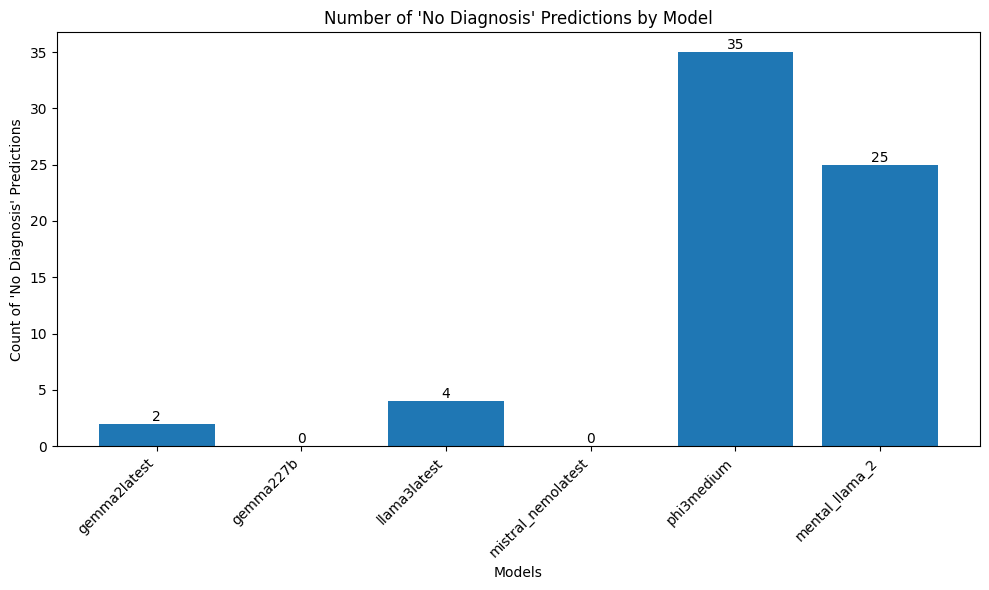


No Diagnosis Counts:
--------------------------------------------------
gemma2latest: 2
gemma227b: 0
llama3latest: 4
mistral_nemolatest: 0
phi3medium: 35
mental_llama_2: 25

Percentages of 'No Diagnosis' Predictions:
--------------------------------------------------
gemma2latest: 1.94%
gemma227b: 0.00%
llama3latest: 3.88%
mistral_nemolatest: 0.00%
phi3medium: 33.98%
mental_llama_2: 24.27%


In [4]:
models = ["gemma2latest", "gemma227b", "llama3latest", "mistral_nemolatest", "phi3medium", "mental_llama_2"]
model_cols = models

# Calculate number of "No diagnosis" predictions for each model
no_diagnosis_counts = {}
for model in models:
    # Count the number of times the model predicts "No diagnosis"
    no_diagnosis_counts[model] = (df[model].astype(str).str.lower() == "no diagnosis").sum()

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(no_diagnosis_counts.keys(), no_diagnosis_counts.values())
plt.title("Number of 'No Diagnosis' Predictions by Model")
plt.xlabel("Models")
plt.ylabel("Count of 'No Diagnosis' Predictions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Optional: Add value labels on top of each bar
for i, (model, count) in enumerate(no_diagnosis_counts.items()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# Print the counts for reference
print("\nNo Diagnosis Counts:")
print("-" * 50)
for model, count in no_diagnosis_counts.items():
    print(f"{model}: {count}")

# Optional: Calculate and print percentages
total_samples = len(df)
print("\nPercentages of 'No Diagnosis' Predictions:")
print("-" * 50)
for model, count in no_diagnosis_counts.items():
    percentage = (count / total_samples) * 100
    print(f"{model}: {percentage:.2f}%")

In [5]:
accuracies = {}
reports = {}

y_true = df[true_label_col].astype(str)
models = ["gemma2latest", "gemma227b", "llama3latest", "mistral_nemolatest", "phi3medium", "mental_llama_2"]
for model in models:
    y_pred = df[model].astype(str)
    
    acc = accuracy_score(y_true, y_pred)
    accuracies[model] = acc
    
    report = classification_report(y_true, y_pred, output_dict=True)
    reports[model] = report

print("\n1. Model Accuracies:")
print("-" * 50)
for model, acc in accuracies.items():
    print(f"{model}: {acc:.4f}")


1. Model Accuracies:
--------------------------------------------------
gemma2latest: 0.2718
gemma227b: 0.5243
llama3latest: 0.1650
mistral_nemolatest: 0.2039
phi3medium: 0.1748
mental_llama_2: 0.0680


c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Ps

In [6]:
accuracy = accuracy_score(df[true_label_col].iloc[0:37].astype(str), df_phi35.astype(str))
print(f"phi3.5: {accuracy:.4f}")

phi3.5: 0.1081


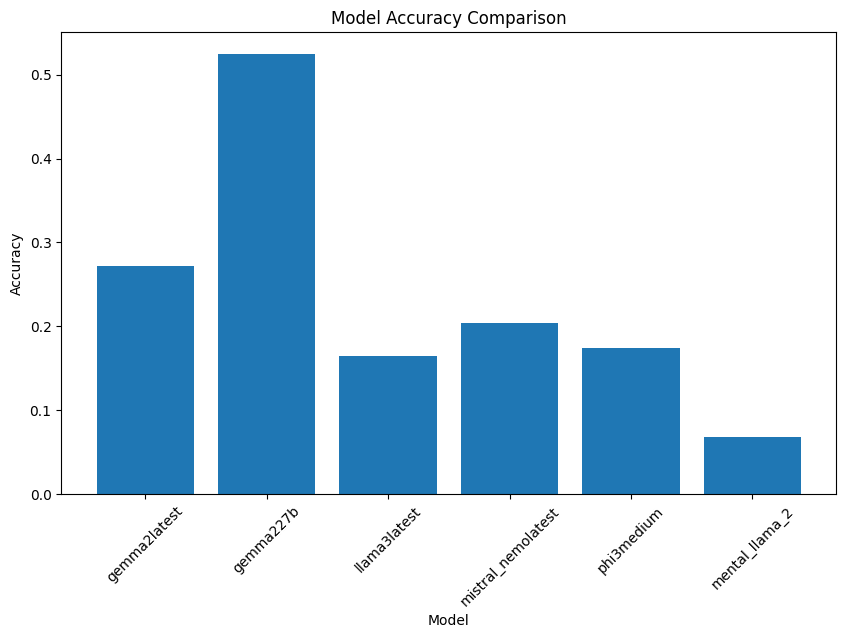

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

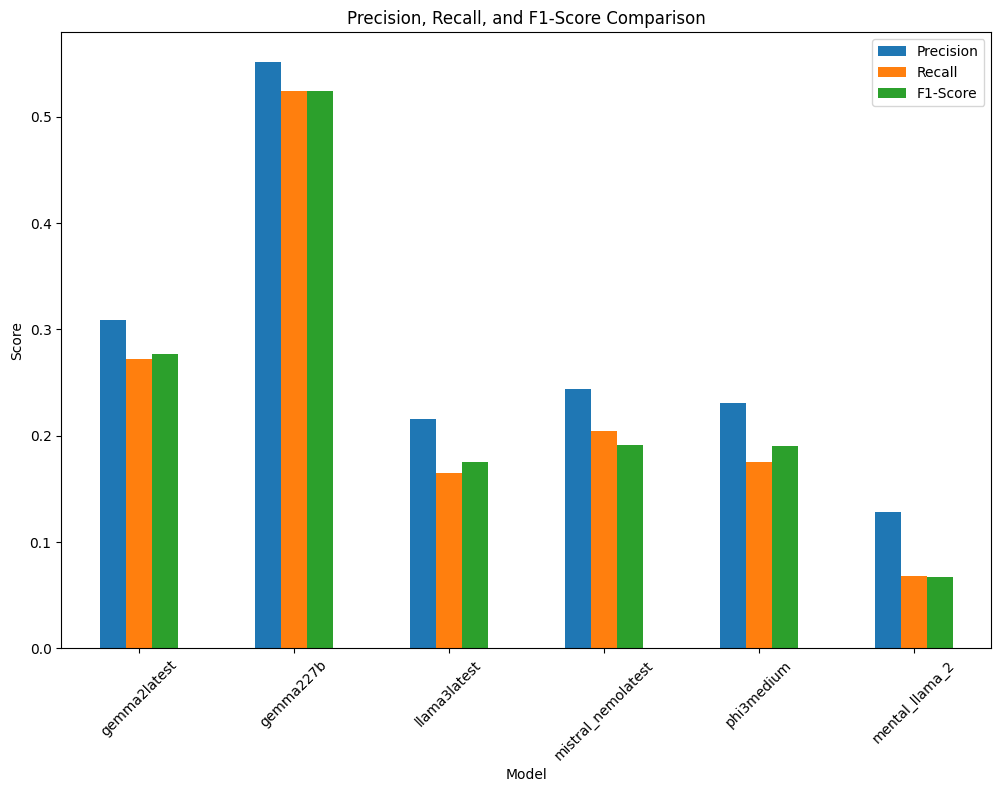

In [8]:
precision_scores = {model: reports[model]['weighted avg']['precision'] for model in models}
recall_scores = {model: reports[model]['weighted avg']['recall'] for model in models}
f1_scores = {model: reports[model]['weighted avg']['f1-score'] for model in models}

metrics_df = pd.DataFrame({'Precision': precision_scores, 'Recall': recall_scores, 'F1-Score': f1_scores})
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Precision, Recall, and F1-Score Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

In [9]:
precision, recall, f1, support = precision_recall_fscore_support(
        df[true_label_col].iloc[0:37].astype(str), 
        df_phi35.astype(str), 
        average='weighted'
    )
print(f"phi3.5: ")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

phi3.5: 
Precision: 0.1014
Recall: 0.1081
F1-Score: 0.0937


c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# 3. Label distribution analysis
print("\n3. Label Distribution Analysis:")
print("-" * 50)
print("\nTrue Label Distribution:")
true_dist = df[true_label_col].value_counts(normalize=True)
print(true_dist)

for col in model_cols:
    print(f"\n{col} Prediction Distribution:")
    pred_dist = df[col].value_counts(normalize=True)
    print(pred_dist)


3. Label Distribution Analysis:
--------------------------------------------------

True Label Distribution:
Brief Diagnosis
Major depressive disorder                   0.087379
Bipolar I disorder                          0.038835
Schizophrenia                               0.038835
Adjustment disorder                         0.038835
Obsessive-compulsive disorder               0.029126
                                              ...   
Illness anxiety disorder                    0.009709
Functional neurological symptom disorder    0.009709
Factitious disorder                         0.009709
Pica intellectual developmental disorder    0.009709
Tobacco use disorder                        0.009709
Name: proportion, Length: 71, dtype: float64

gemma2latest Prediction Distribution:
gemma2latest
Major Depressive Disorder                    0.079208
delusional disorder                          0.059406
obsessive-compulsive disorder                0.039604
Obsessive-compulsive disorder   

In [11]:
print("\nDetailed Metrics per Model:")
print("-" * 50)
for model in models:
    precision, recall, f1, support = precision_recall_fscore_support(
        df[true_label_col].astype(str), 
        df[model].astype(str), 
        average='weighted'
    )
    print(f"\n{model}:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


Detailed Metrics per Model:
--------------------------------------------------

gemma2latest:
Precision: 0.3091
Recall: 0.2718
F1-Score: 0.2765

gemma227b:
Precision: 0.5518
Recall: 0.5243
F1-Score: 0.5240

llama3latest:
Precision: 0.2152
Recall: 0.1650
F1-Score: 0.1747

mistral_nemolatest:
Precision: 0.2441
Recall: 0.2039
F1-Score: 0.1916

phi3medium:
Precision: 0.2306
Recall: 0.1748
F1-Score: 0.1905

mental_llama_2:
Precision: 0.1279
Recall: 0.0680
F1-Score: 0.0672


c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Ps


4. Model Agreement Analysis:
--------------------------------------------------


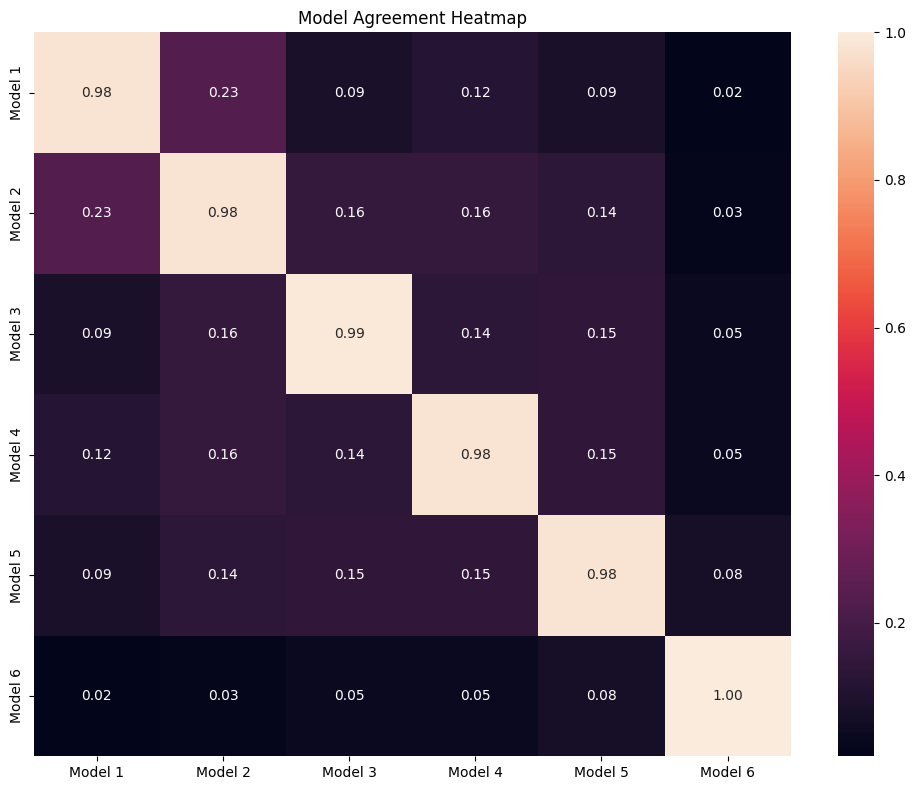

In [12]:
print("\n4. Model Agreement Analysis:")
print("-" * 50)
agreement_matrix = np.zeros((len(models), len(models)))

for i, model1 in enumerate(models):
    for j, model2 in enumerate(models):
        agreement = np.mean(df[model1] == df[model2])
        agreement_matrix[i, j] = agreement
plt.figure(figsize=(10, 8))
sns.heatmap(agreement_matrix, 
            annot=True, 
            fmt='.2f', 
            xticklabels=[f'Model {i+1}' for i in range(len(models))],
            yticklabels=[f'Model {i+1}' for i in range(len(models))])
plt.title('Model Agreement Heatmap')
plt.tight_layout()
plt.show()

In [13]:
print("\n5. Error Analysis:")
print("-" * 50)
for col in models:
    incorrect_predictions = df[df[true_label_col] != df[col]]
    print(f"\n{col} - Most Common Misclassifications:")
    error_pairs = pd.DataFrame({
        'True': incorrect_predictions[true_label_col],
        'Predicted': incorrect_predictions[col]
    }).value_counts().head()
    print(error_pairs)


5. Error Analysis:
--------------------------------------------------

gemma2latest - Most Common Misclassifications:
True                       Predicted                
Major depressive disorder  Major Depressive Disorder    4
Acute stress disorder      acute stress disorder        2
Opioid use disorder        opioid use disorder          2
Major depressive disorder  major depressive disorder    2
Schizophrenia              Delusional disorder          2
Name: count, dtype: int64

gemma227b - Most Common Misclassifications:
True                                   Predicted                        
Acute stress disorder                  Posttraumatic stress disorder        1
Schizoaffective disorder               Recurrent depressive disorder        1
Medication-induced sexual dysfunction  Major depressive disorder            1
Mild neurocognitive disorder           Acquired neurobehavioral disorder    1
                                       Schizophrenia                        1
Name

In [14]:
print("\nClassification Report:")
for col in models:
    print(f"\n{col} - Classification Report:")
    print(classification_report(df[true_label_col].astype(str), df[col].astype(str)))


Classification Report:

gemma2latest - Classification Report:
                                           precision    recall  f1-score   support

                                        -       0.00      0.00      0.00         2
                    Acute stress disorder       0.00      0.00      0.00         2
                      Adjustment disorder       1.00      0.25      0.40         4
                     Alcohol use disorder       1.00      1.00      1.00         3
                         Anorexia nervosa       0.00      0.00      0.00         1
          Antisocial personality disorder       1.00      1.00      1.00         1
                 Autism Spectrum Disorder       0.00      0.00      0.00         0
                 Autism spectrum disorder       0.00      0.00      0.00         1
            Avoidant personality disorder       0.00      0.00      0.00         1
Avoidant/Restrictive Food Intake Disorder       1.00      1.00      1.00         1
                    Bin

c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Ps

In [15]:
print("\n6. Ensemble Analysis (Majority Voting):")
print("-" * 50)

def majority_vote(row):
    predictions = row[models].values
    return max(set(predictions), key=list(predictions).count)

df['ensemble_prediction'] = df.apply(majority_vote, axis=1)
ensemble_accuracy = accuracy_score(df[true_label_col].astype(str), df['ensemble_prediction'].astype(str))
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")


6. Ensemble Analysis (Majority Voting):
--------------------------------------------------
Ensemble Accuracy: 0.4078


In [16]:
# 7. Per-class performance for ensemble
print("\nEnsemble Classification Report:")
print(classification_report(df[true_label_col].astype(str), df['ensemble_prediction'].astype(str)))


Ensemble Classification Report:
                                           precision    recall  f1-score   support

                                        -       0.00      0.00      0.00         2
                    Acute stress disorder       1.00      0.50      0.67         2
                      Adjustment disorder       1.00      0.25      0.40         4
                     Alcohol use disorder       1.00      1.00      1.00         3
                         Anorexia nervosa       1.00      1.00      1.00         1
          Antisocial personality disorder       1.00      1.00      1.00         1
                 Autism spectrum disorder       0.00      0.00      0.00         1
            Avoidant personality disorder       0.00      0.00      0.00         1
Avoidant/Restrictive Food Intake Disorder       1.00      1.00      1.00         1
                    Binge-eating disorder       1.00      1.00      1.00         1
                       Bipolar I Disorder       0.00 

c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Psycho-chat\training\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Noovle\Ps

In [17]:
from difflib import SequenceMatcher
from Levenshtein import distance as levenshtein_distance
import nltk
from nltk.util import ngrams

In [18]:
def text_similarity_metrics(text1, text2, weights = dict(zip(['sequence', 'levenshtein', 'jaccard', 'hamming', 'trigram'], 
                                                             [0.2, 0.2, 0.2, 0.2, 0.2]))):
    """
    Calculate various text similarity metrics between two strings.
    Returns similarity scores between 0 and 1 (1 being identical).
    """
    if pd.isna(text1) or pd.isna(text2):
        return 0
    
    # Convert to lowercase and remove extra spaces
    text1 = ' '.join(str(text1).lower().split())
    text2 = ' '.join(str(text2).lower().split())
    
    # 1. Sequence Matcher (similar to difflib)
    sequence_similarity = SequenceMatcher(None, text1, text2).ratio()
    
    # 2. Levenshtein-based similarity
    max_len = max(len(text1), len(text2))
    levenshtein_similarity = 1 - (levenshtein_distance(text1, text2) / max_len if max_len > 0 else 0)
    
    # 3. Word-based Jaccard similarity
    words1 = set(text1.split())
    words2 = set(text2.split())
    intersection = len(words1.intersection(words2))
    union = len(words1.union(words2))
    jaccard_similarity = intersection / union if union > 0 else 0
    
    # 4. N-gram similarity (using trigrams)
    def get_ngrams(text, n=3):
        return set(''.join(gram) for gram in ngrams(text, n))
    
    if len(text1) >= 3 and len(text2) >= 3:
        trigrams1 = get_ngrams(text1)
        trigrams2 = get_ngrams(text2)
        trigram_intersection = len(trigrams1.intersection(trigrams2))
        trigram_union = len(trigrams1.union(trigrams2))
        trigram_similarity = trigram_intersection / trigram_union if trigram_union > 0 else 0
    else:
        trigram_similarity = sequence_similarity  # fallback for very short texts
    
    # 5. Hamming-based similarity
    max_len = max(len(text1), len(text2))
    text1 = text1.ljust(max_len)
    text2 = text2.ljust(max_len)
    hamming_dist = sum(c1 != c2 for c1, c2 in zip(text1, text2))
    hamming_similarity = 1 - (hamming_dist / max_len)
    
    # Calculate weighted average of all similarities
    # weights = [0.2, 0.2, 0.2, 0.2, 0.2]  # weights for each metric
    combined_similarity = (
        weights['sequence'] * sequence_similarity +
        weights['levenshtein'] * levenshtein_similarity +
        weights['jaccard'] * jaccard_similarity +
        weights['hamming'] * hamming_similarity +
        weights['trigram'] * trigram_similarity
    )
    
    return combined_similarity

def is_prediction_correct(true_text, pred_text, threshold=0.8):
    similarity = text_similarity_metrics(true_text, pred_text)
    return similarity >= threshold, similarity

In [19]:
model_cols

['gemma2latest',
 'gemma227b',
 'llama3latest',
 'mistral_nemolatest',
 'phi3medium',
 'mental_llama_2']

In [20]:
similarity_threshold=0.8

results = {}
accuracies = {}

print(f"1. Model Accuracies (similarity threshold: {similarity_threshold}):")
print("-" * 50)

similarity_matrices = {}
for col in model_cols:
    similarities = []
    correct_predictions = []
    
    for true, pred in zip(df[true_label_col], df[col]):
        is_correct, similarity = is_prediction_correct(true, pred, similarity_threshold)
        similarities.append(similarity)
        correct_predictions.append(is_correct)
    
    accuracy = np.mean(correct_predictions)
    avg_similarity = np.mean(similarities)
    
    results[col] = {
        "accuracy": accuracy,
        "avg_similarity": avg_similarity,
        "similarities": similarities
    }
    accuracies[col] = accuracy
    
    print(f"\n{col}:")
    print(f"Accuracy (similarity >= {similarity_threshold}): {accuracy:.4f}")
    print(f"Average Similarity Score: {avg_similarity:.4f}")
    
    similarity_matrices[col] = similarities

1. Model Accuracies (similarity threshold: 0.8):
--------------------------------------------------

gemma2latest:
Accuracy (similarity >= 0.8): 0.5049
Average Similarity Score: 0.6565

gemma227b:
Accuracy (similarity >= 0.8): 0.5340
Average Similarity Score: 0.6488

llama3latest:
Accuracy (similarity >= 0.8): 0.1650
Average Similarity Score: 0.4056

mistral_nemolatest:
Accuracy (similarity >= 0.8): 0.2039
Average Similarity Score: 0.3977

phi3medium:
Accuracy (similarity >= 0.8): 0.1748
Average Similarity Score: 0.3179

mental_llama_2:
Accuracy (similarity >= 0.8): 0.0971
Average Similarity Score: 0.3277


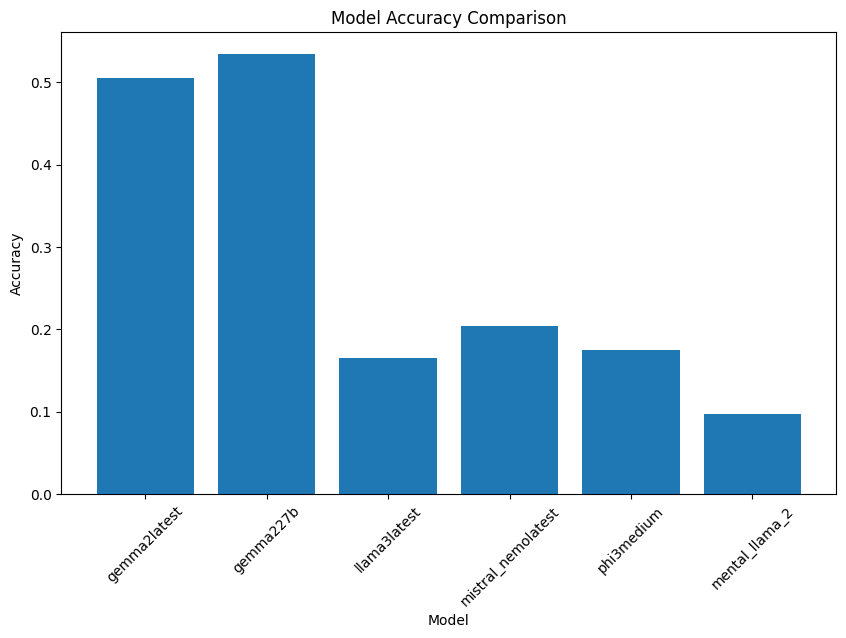

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()


. Similarity Score Distribution Analysis:
--------------------------------------------------


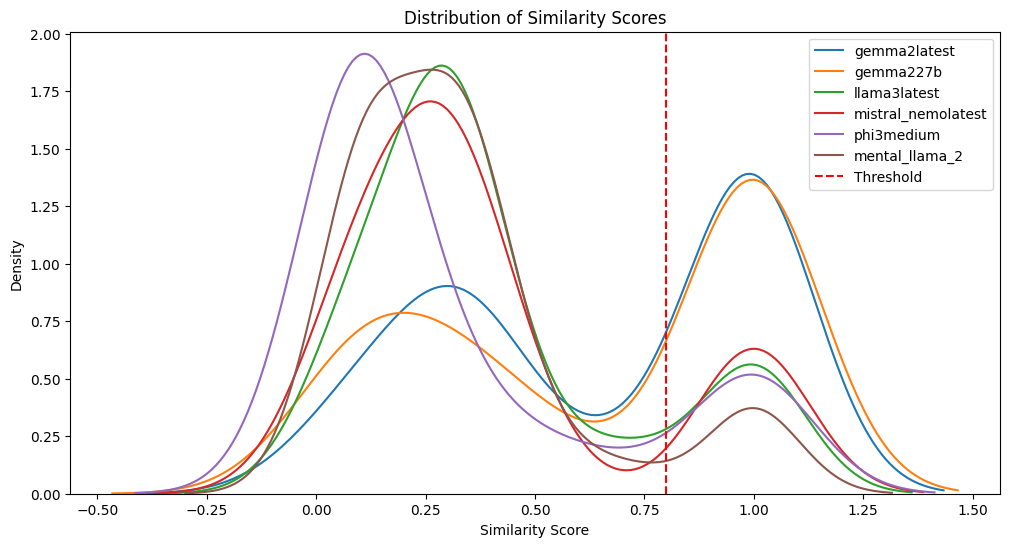

In [22]:
print("\n. Similarity Score Distribution Analysis:")
print("-" * 50)

plt.figure(figsize=(12, 6))
for col in model_cols:
    sns.kdeplot(similarity_matrices[col], label=col)
plt.axvline(x=similarity_threshold, color='r', linestyle='--', label='Threshold')
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


. Sensitivity Analysis:
--------------------------------------------------


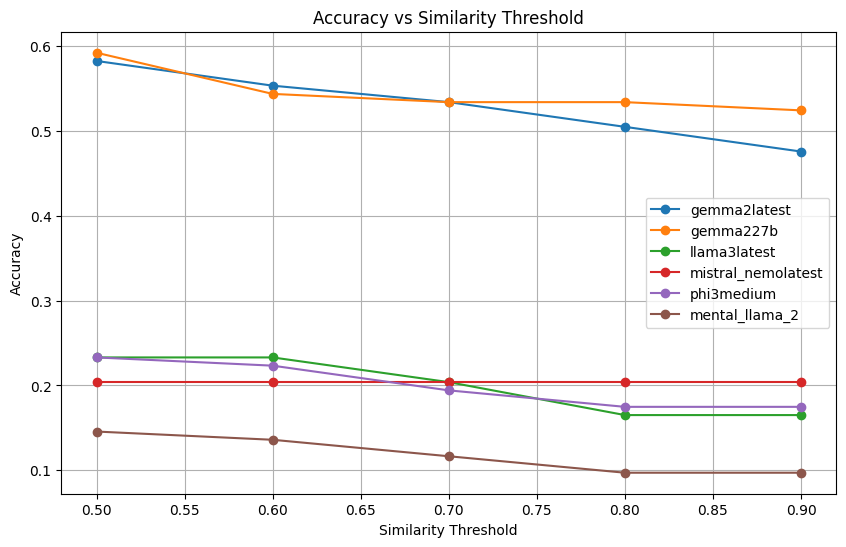

In [23]:
print("\n. Sensitivity Analysis:")
print("-" * 50)

thresholds = np.arange(0.5, 1.0, 0.1)
sensitivity_results = {}

for threshold in thresholds:
    accuracies = {}
    for col in model_cols:
        correct_predictions = [
            is_prediction_correct(true, pred, threshold)[0]
            for true, pred in zip(df[true_label_col], df[col])
        ]
        accuracies[col] = np.mean(correct_predictions)
    sensitivity_results[threshold] = accuracies

plt.figure(figsize=(10, 6))
for col in model_cols:
    plt.plot(thresholds, [sensitivity_results[t][col] for t in thresholds], 
            marker='o', label=col)
plt.title('Accuracy vs Similarity Threshold')
plt.xlabel('Similarity Threshold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
print("\nError Analysis:")
print("-" * 50)

for col in model_cols:
    print(f"\n{col} - Sample of Low Similarity Cases:")
    similarities = similarity_matrices[col]
    
    # Get indices of lowest similarity scores
    worst_indices = np.argsort(similarities)[:5]
    
    error_analysis = pd.DataFrame({
        'True Label': df.iloc[worst_indices][true_label_col],
        'Prediction': df.iloc[worst_indices][col],
        'Similarity': [similarities[i] for i in worst_indices]
    })
    print(error_analysis)


Error Analysis:
--------------------------------------------------

gemma2latest - Sample of Low Similarity Cases:
             True Label           Prediction  Similarity
53                    -                  NaN    0.000000
59                    -                  NaN    0.000000
11   Bipolar I disorder        Schizophrenia    0.072043
101       Schizophrenia  delusional disorder    0.083553
5         Schizophrenia  Delusional disorder    0.083553

gemma227b - Sample of Low Similarity Cases:
                  True Label                            Prediction  Similarity
53                         -                                   NaN    0.000000
59                         -                                   NaN    0.000000
17  Bipolar induced disorder                             Catatonia    0.057576
83                  Delirium  Substance-induced psychotic disorder    0.060606
7        Delusional disorder                    Paranoid Psychosis    0.064296

llama3latest - Sample 

In [25]:
print("\nEnsemble Analysis:")
print("-" * 50)

def weighted_ensemble_prediction(row):
    predictions = []
    weights = []
    
    for col in model_cols:
        pred = row[col]
        similarities = [text_similarity_metrics(pred, row[true_label_col])]
        weight = max(similarities)
        predictions.append(pred)
        weights.append(weight)
    
    return predictions[np.argmax(weights)]

df['ensemble_prediction'] = df.apply(weighted_ensemble_prediction, axis=1)

ensemble_correct = []
ensemble_similarities = []

for true, pred in zip(df[true_label_col], df['ensemble_prediction']):
    is_correct, similarity = is_prediction_correct(true, pred, similarity_threshold)
    ensemble_correct.append(is_correct)
    ensemble_similarities.append(similarity)

ensemble_accuracy = np.mean(ensemble_correct)
ensemble_avg_similarity = np.mean(ensemble_similarities)

print(f"Ensemble Accuracy (similarity >= {similarity_threshold}): {ensemble_accuracy:.4f}")
print(f"Ensemble Average Similarity Score: {ensemble_avg_similarity:.4f}")


Ensemble Analysis:
--------------------------------------------------
Ensemble Accuracy (similarity >= 0.8): 0.7476
Ensemble Average Similarity Score: 0.8300


# Weight Analysis

In [26]:
from itertools import product
import itertools

# Generate weight combinations
weight_values = [0, 0.25, 0.5, 0.75, 1.0]
metrics = ['sequence', 'levenshtein', 'jaccard', 'hamming', 'trigram']

results = []

# Generate combinations where weights sum to 1
for weights in product(weight_values, repeat=len(metrics)):
    if abs(sum(weights) - 1.0) < 0.001:  # Check if weights sum to 1
        weight_dict = dict(zip(metrics, weights))
        
        # Calculate accuracies for each model
        model_accuracies = {}
        for col in model_cols:
            correct_predictions = []
            for true, pred in zip(df[true_label_col], df[col]):
                similarity = text_similarity_metrics(true, pred, weight_dict)
                correct_predictions.append(similarity >= threshold)
            model_accuracies[col] = np.mean(correct_predictions)
        
        # Store results
        results.append({
            'weights': weight_dict,
            'avg_accuracy': np.mean(list(model_accuracies.values())),
            'min_accuracy': min(model_accuracies.values()),
            'max_accuracy': max(model_accuracies.values()),
            'std_accuracy': np.std(list(model_accuracies.values())),
            **model_accuracies
        })

weight_combinations = pd.DataFrame(results)

In [27]:
weight_combinations.head()

,weights,avg_accuracy,min_accuracy,max_accuracy,std_accuracy,gemma2latest,gemma227b,llama3latest,mistral_nemolatest,phi3medium,mental_llama_2
0,"{'sequence': 0, 'levenshtein': 0, 'jaccard': 0...",0.273463,0.097087,0.524272,0.163942,0.475728,0.524272,0.165049,0.203883,0.174757,0.097087
1,"{'sequence': 0, 'levenshtein': 0, 'jaccard': 0...",0.273463,0.097087,0.524272,0.163942,0.475728,0.524272,0.165049,0.203883,0.174757,0.097087
2,"{'sequence': 0, 'levenshtein': 0, 'jaccard': 0...",0.275081,0.097087,0.524272,0.165966,0.485437,0.524272,0.165049,0.203883,0.174757,0.097087
3,"{'sequence': 0, 'levenshtein': 0, 'jaccard': 0...",0.279935,0.097087,0.533981,0.172533,0.504854,0.533981,0.165049,0.203883,0.174757,0.097087
4,"{'sequence': 0, 'levenshtein': 0, 'jaccard': 0...",0.279935,0.097087,0.533981,0.172533,0.504854,0.533981,0.165049,0.203883,0.174757,0.097087


Text(0, 0.5, 'Count')

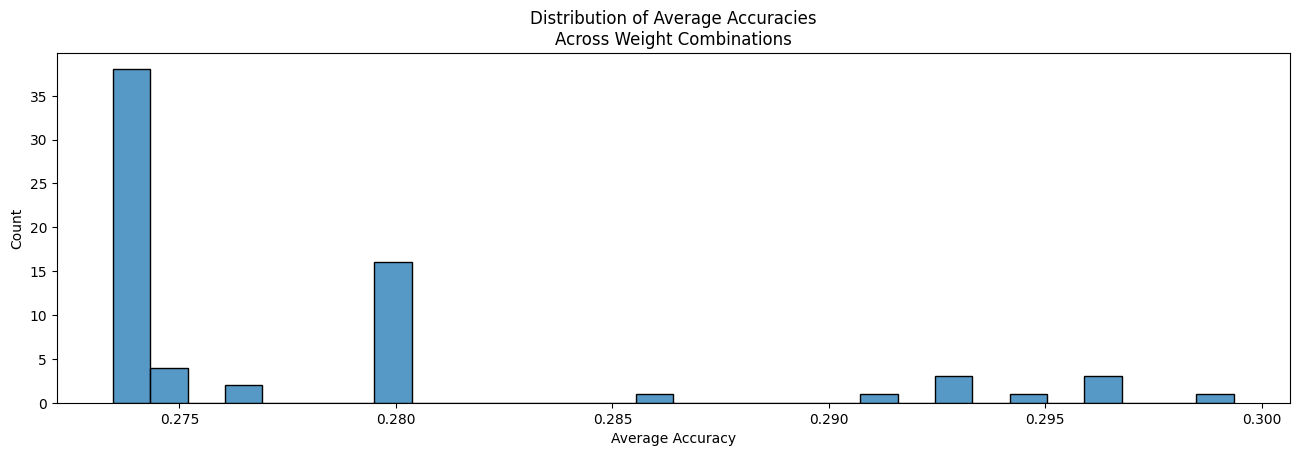

In [28]:
results_df = weight_combinations.copy()

plt.figure(figsize=(35, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=results_df, x='avg_accuracy', bins=30)
plt.title('Distribution of Average Accuracies\nAcross Weight Combinations')
plt.xlabel('Average Accuracy')
plt.ylabel('Count')

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'sequence'),
  Text(2, 0, 'levenshtein'),
  Text(3, 0, 'jaccard'),
  Text(4, 0, 'hamming'),
  Text(5, 0, 'trigram')])

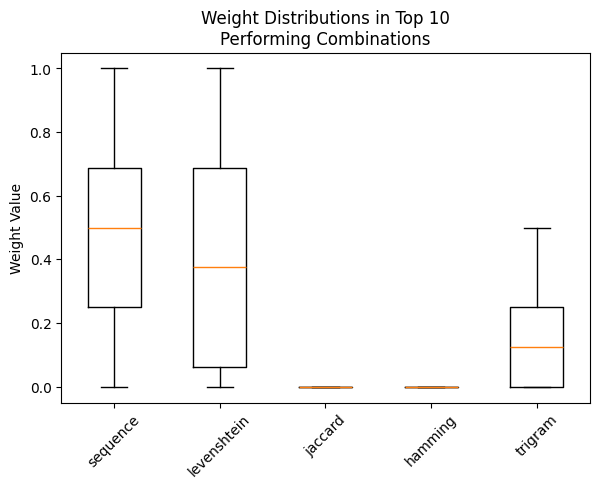

In [29]:
top_n = 10
top_combinations = results_df.nlargest(top_n, 'avg_accuracy')

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
metrics = ['sequence', 'levenshtein', 'jaccard', 'hamming', 'trigram']
weights_data = []
for metric in metrics:
    weights_data.append([row['weights'][metric] for _, row in top_combinations.iterrows()])

box_plot = plt.boxplot(weights_data, tick_labels=metrics)
plt.title(f'Weight Distributions in Top {top_n}\nPerforming Combinations')
plt.ylabel('Weight Value')
plt.xticks(rotation=45)

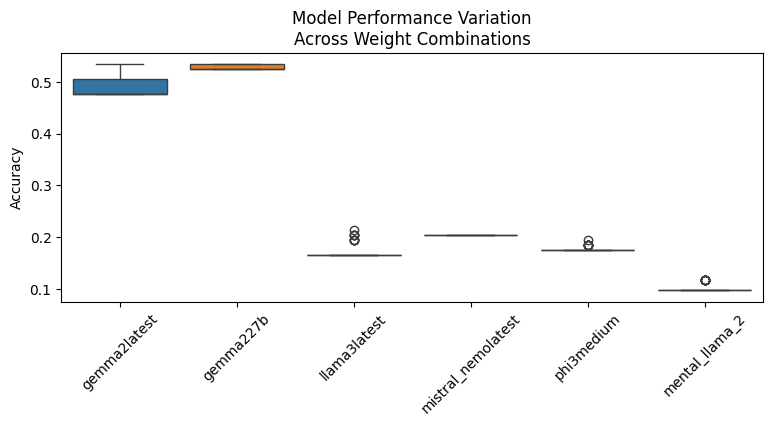

In [30]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 4)
sns.boxplot(data=results_df[[col for col in results_df.columns if col in models]])
plt.title('Model Performance Variation\nAcross Weight Combinations')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

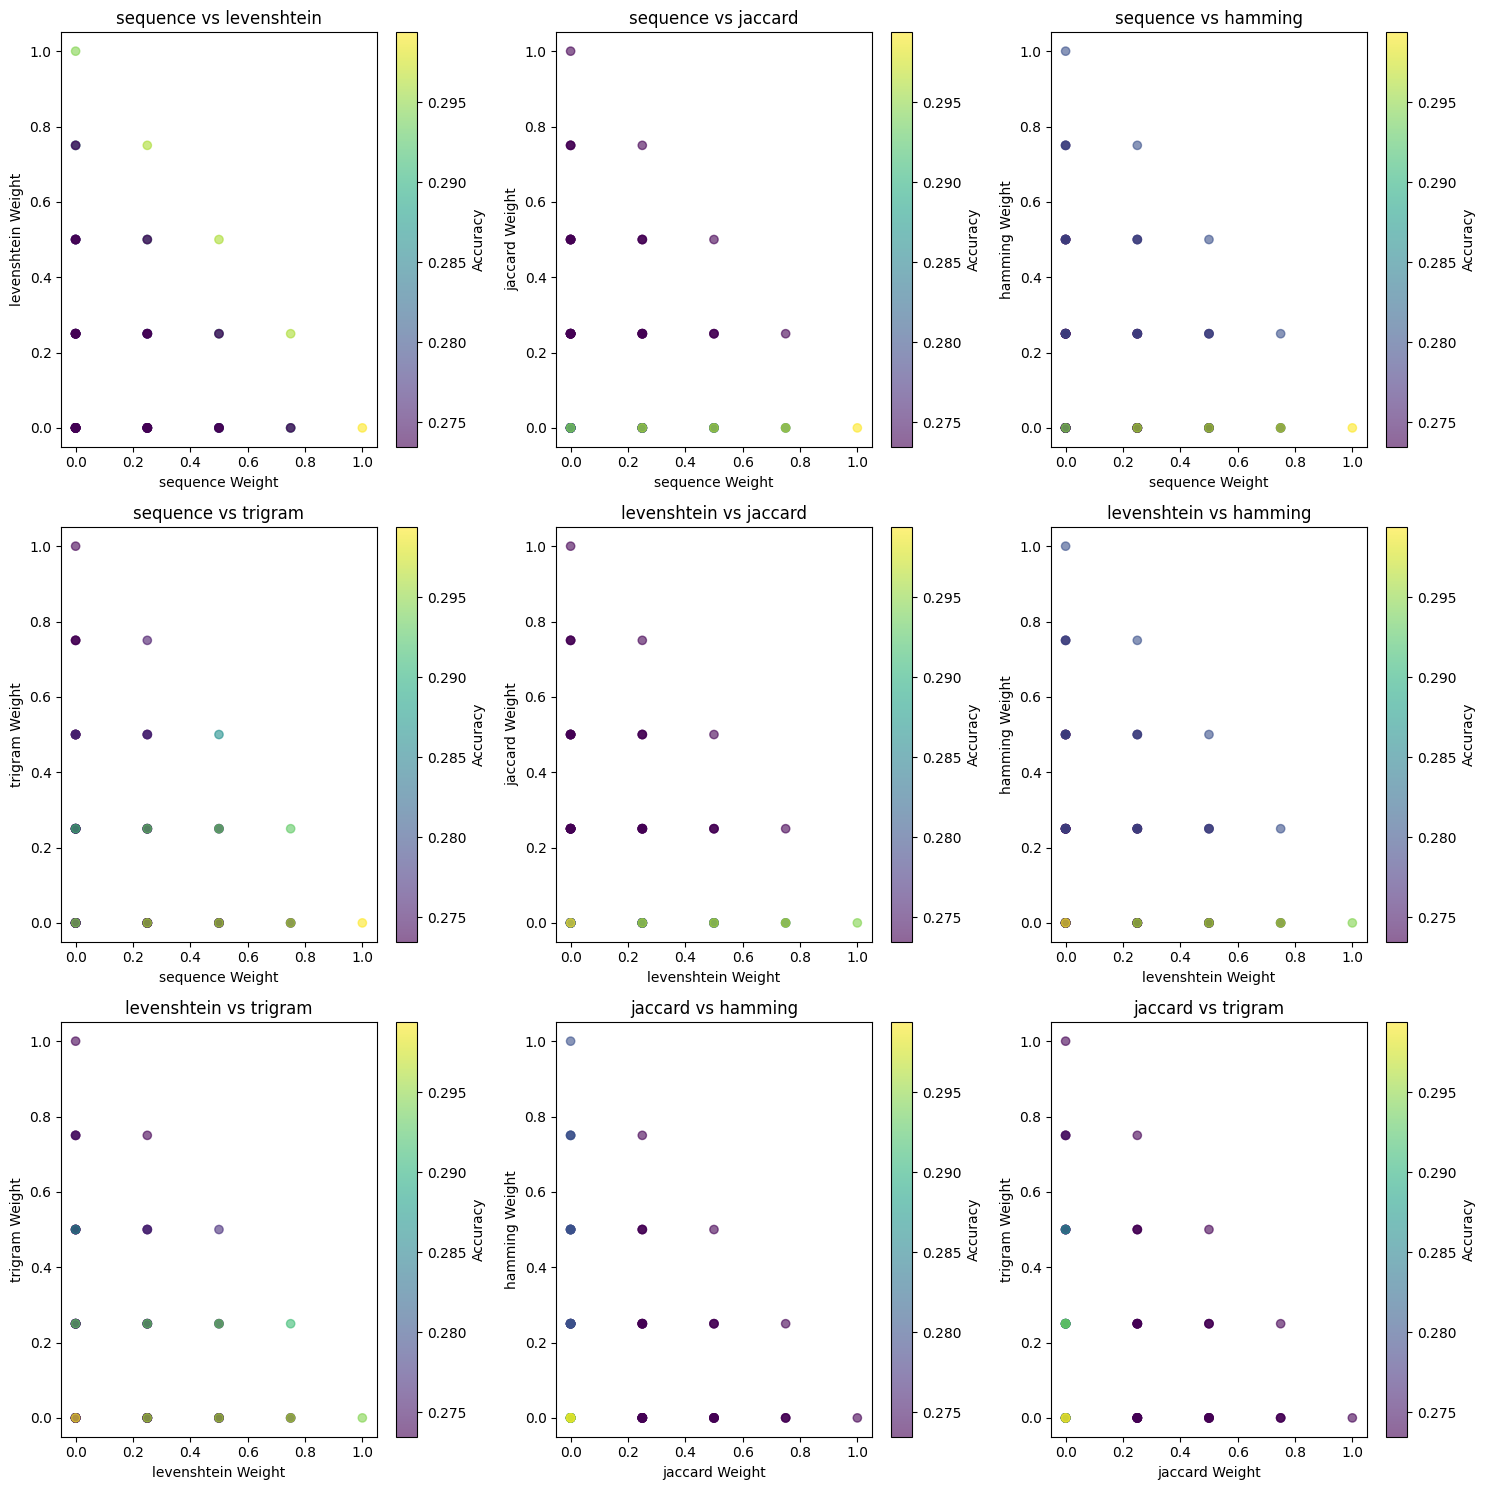

In [31]:
plt.figure(figsize=(15, 15))
metric_pairs = list(itertools.combinations(metrics, 2))

for idx, (metric1, metric2) in enumerate(metric_pairs[:9], 1):  # Show top 9 pairs
    plt.subplot(3, 3, idx)
    
    weights1 = [row['weights'][metric1] for _, row in results_df.iterrows()]
    weights2 = [row['weights'][metric2] for _, row in results_df.iterrows()]
    accuracies = results_df['avg_accuracy']
    
    plt.scatter(weights1, weights2, c=accuracies, cmap='viridis', alpha=0.6)
    plt.colorbar(label='Accuracy')
    plt.xlabel(f'{metric1} Weight')
    plt.ylabel(f'{metric2} Weight')
    plt.title(f'{metric1} vs {metric2}')

plt.tight_layout()
plt.show()

In [32]:
# Print optimal weight combinations
print("\nTop 5 Weight Combinations:")
for idx, row in results_df.nlargest(5, 'avg_accuracy').iterrows():
    print(f"\nCombination {idx + 1}:")
    print(f"Average Accuracy: {row['avg_accuracy']:.4f}")
    print("Weights:")
    for metric, weight in row['weights'].items():
        print(f"  {metric}: {weight:.3f}")
    print("Individual Model Accuracies:")
    for col in model_cols:
        print(f"  {col}: {row[col]:.4f}")


Top 5 Weight Combinations:

Combination 70:
Average Accuracy: 0.2994
Weights:
  sequence: 1.000
  levenshtein: 0.000
  jaccard: 0.000
  hamming: 0.000
  trigram: 0.000
Individual Model Accuracies:
  gemma2latest: 0.5340
  gemma227b: 0.5340
  llama3latest: 0.2136
  mistral_nemolatest: 0.2039
  phi3medium: 0.1942
  mental_llama_2: 0.1165

Combination 55:
Average Accuracy: 0.2961
Weights:
  sequence: 0.250
  levenshtein: 0.750
  jaccard: 0.000
  hamming: 0.000
  trigram: 0.000
Individual Model Accuracies:
  gemma2latest: 0.5340
  gemma227b: 0.5340
  llama3latest: 0.2039
  mistral_nemolatest: 0.2039
  phi3medium: 0.1845
  mental_llama_2: 0.1165

Combination 65:
Average Accuracy: 0.2961
Weights:
  sequence: 0.500
  levenshtein: 0.500
  jaccard: 0.000
  hamming: 0.000
  trigram: 0.000
Individual Model Accuracies:
  gemma2latest: 0.5340
  gemma227b: 0.5340
  llama3latest: 0.2039
  mistral_nemolatest: 0.2039
  phi3medium: 0.1845
  mental_llama_2: 0.1165

Combination 69:
Average Accuracy: 0.29

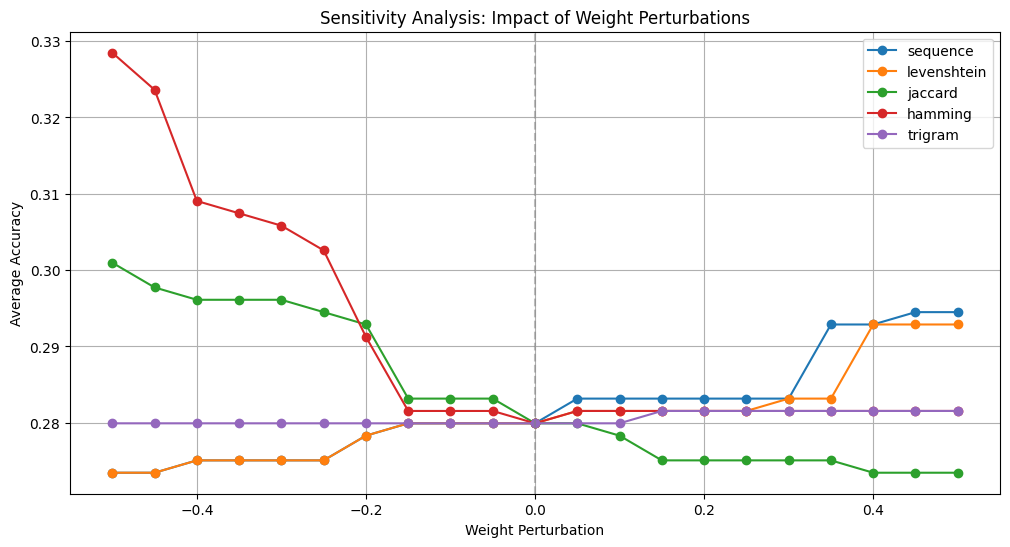

In [33]:
base_weights = {
    'sequence': 0.2,
    'levenshtein': 0.2,
    'jaccard': 0.2,
    'hamming': 0.2,
    'trigram': 0.2
}

# Perturbation range
perturbation = np.linspace(-0.5, 0.5, 21)

sensitivity_results = []

# Analyze each metric's sensitivity
for metric in base_weights.keys():
    accuracies = []
    for delta in perturbation:
        # Create perturbed weights
        weights = base_weights.copy()
        weights[metric] += delta
        
        # Normalize weights to sum to 1
        total = sum(weights.values())
        weights = {k: v/total for k, v in weights.items()}
        
        # Calculate accuracy
        correct_predictions = []
        for col in model_cols:
            for true, pred in zip(df[true_label_col], df[col]):
                similarity = text_similarity_metrics(true, pred, weights)
                correct_predictions.append(similarity >= 0.8)
        
        accuracies.append(np.mean(correct_predictions))
    
    sensitivity_results.append({
        'metric': metric,
        'perturbation': perturbation,
        'accuracies': accuracies
    })

# Plot sensitivity analysis
plt.figure(figsize=(12, 6))
for result in sensitivity_results:
    plt.plot(result['perturbation'], result['accuracies'], 
            label=result['metric'], marker='o')

plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.title('Sensitivity Analysis: Impact of Weight Perturbations')
plt.xlabel('Weight Perturbation')
plt.ylabel('Average Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Load the log file and extract relevant data
log_path = 'log.txt'

# Reading the log file
with open(log_path, 'r') as file:
    lines = file.readlines()

# Extract lines with execution times
execution_data = []
for line in lines:
    if "Tempo elaborazione" in line:
        try:
            # Extract execution time (ignoring cases with "Tempo elaborazione: 0.0s")
            time_str = line.split("Tempo elaborazione:")[1].split("s")[0].strip()
            exec_time = float(time_str)
            if exec_time > 0:
                execution_data.append(exec_time)
        except (IndexError, ValueError):
            continue

# Create a DataFrame for analysis
execution_times = pd.DataFrame(execution_data, columns=['Execution Time'])

# Calculate statistics
mean_time = execution_times['Execution Time'].mean()
median_time = execution_times['Execution Time'].median()
std_time = execution_times['Execution Time'].std()

mean_time, median_time, std_time


(7.386716331078826, 5.054669380187988, 7.287990789341638)

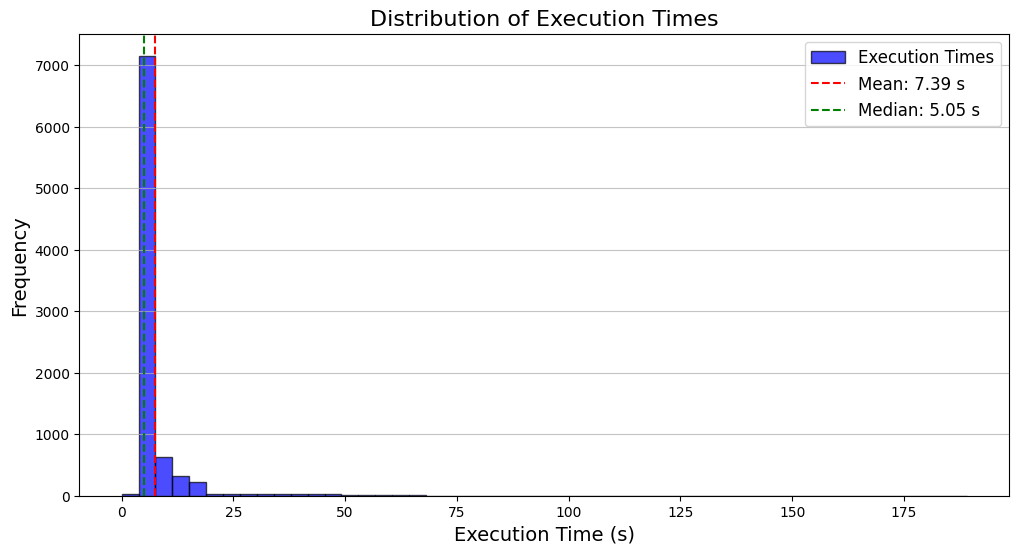

In [35]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Histogram for execution times
plt.hist(execution_times['Execution Time'], bins=50, color='blue', alpha=0.7, edgecolor='black', label='Execution Times')

# Add lines for mean and median
plt.axvline(mean_time, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_time:.2f} s')
plt.axvline(median_time, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_time:.2f} s')

# Labels and title
plt.title('Distribution of Execution Times', fontsize=16)
plt.xlabel('Execution Time (s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()


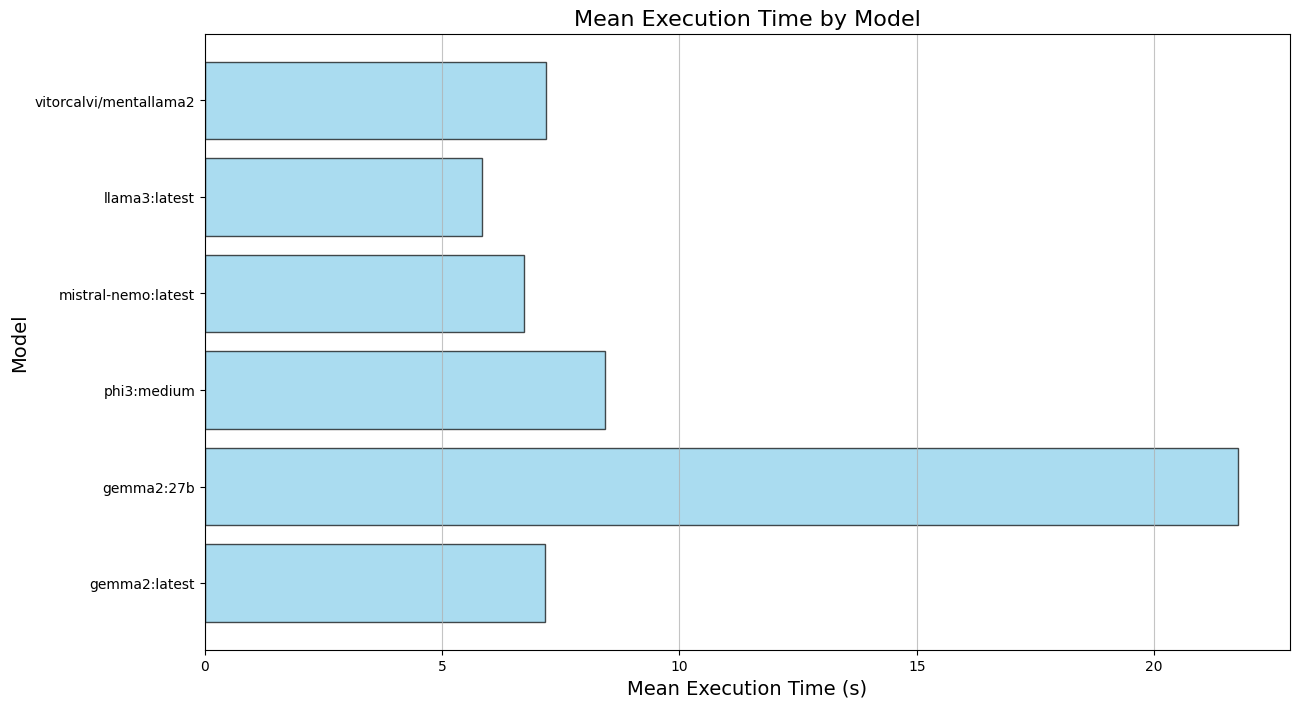

In [50]:
from collections import defaultdict

# Extract model and execution time from the log lines
model_execution_data = defaultdict(list)
for line in lines:
    if "modello:" in line and "Tempo elaborazione" in line:
        try:
            # Extract model
            model = line.split("modello:")[1].split("--")[0].strip()
            # Extract execution time
            time_str = line.split("Tempo elaborazione:")[1].split("s")[0].strip()
            exec_time = float(time_str)
            if exec_time > 0:
                model_execution_data[model].append(exec_time)
        except (IndexError, ValueError):
            continue

# Create a DataFrame with grouped data
model_execution_stats = []
for model, times in model_execution_data.items():
    mean = sum(times) / len(times)
    median = pd.Series(times).median()
    std_dev = pd.Series(times).std()
    model_execution_stats.append({"Model": model, "Mean": mean, "Median": median, "Std Dev": std_dev})

model_stats_df = pd.DataFrame(model_execution_stats)
model_stats_df = model_stats_df.drop([0, 6, 7])
model_stats_df = model_stats_df.rename(columns={"llama3:latest": "llama3", "mistral-nemo:latest": "mistral-nemo", "gemma2:latest": "gemma2", 
                        "vitorcalvi/mentallama2": "mentallama2"}).reset_index(drop=True)

# Plotting grouped statistics
plt.figure(figsize=(14, 8))

# Bar plot for mean execution times grouped by model
plt.barh(model_stats_df["Model"], model_stats_df["Mean"], color='skyblue', edgecolor='black', alpha=0.7)

# Labels and title
plt.title('Mean Execution Time by Model', fontsize=16)
plt.xlabel('Mean Execution Time (s)', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.grid(axis='x', alpha=0.75)

# Show the plot
plt.show()

In [51]:
model_stats_df

,Model,Mean,Median,Std Dev
0,gemma2:latest,7.172623,7.019947,0.970542
1,gemma2:27b,21.772862,15.457087,15.562256
2,phi3:medium,8.438673,7.813088,3.144724
3,mistral-nemo:latest,6.713741,6.624002,1.097880
4,llama3:latest,5.845652,5.846007,0.638262
5,vitorcalvi/mentallama2,7.178625,6.881982,1.957613


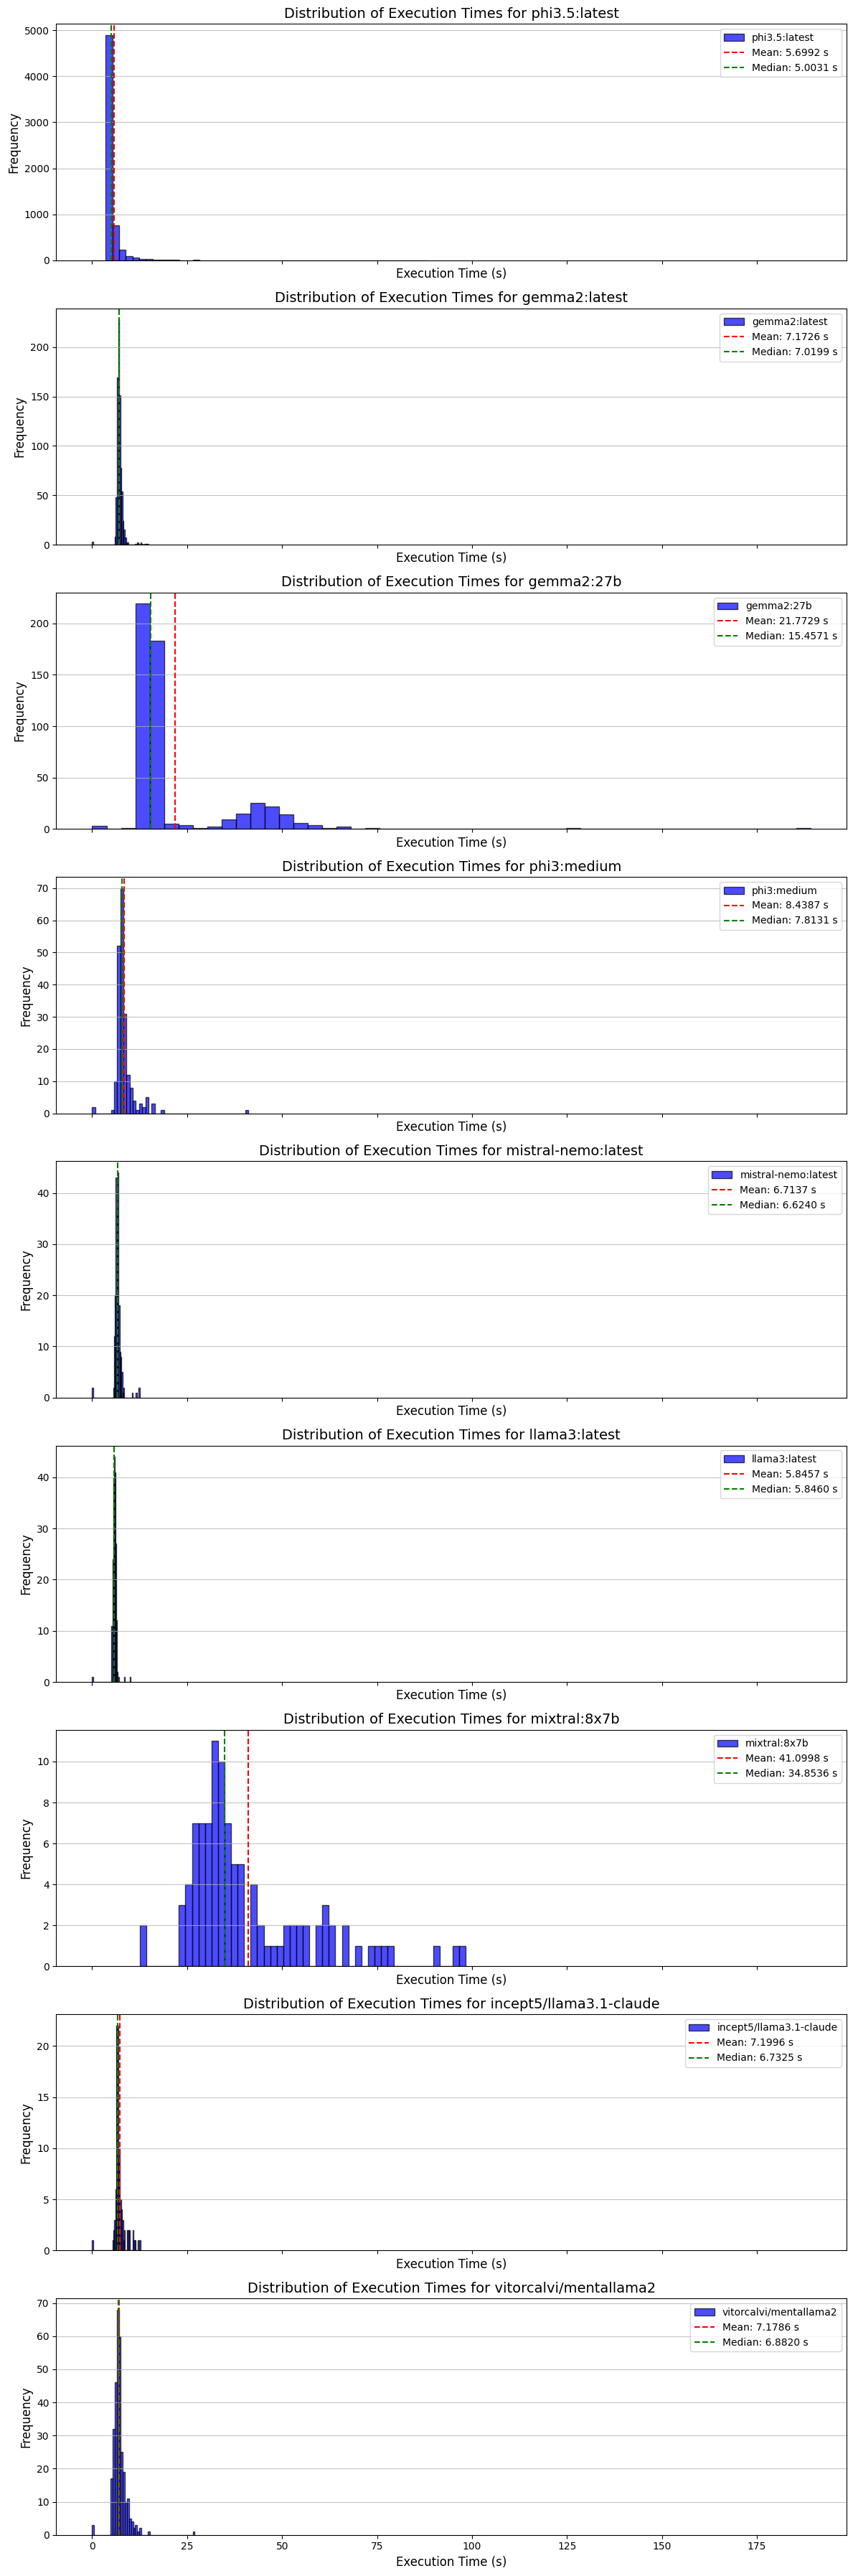

In [65]:
# Generate histograms for each model's execution times
models = model_execution_data.keys()

# Create subplots for individual histograms
fig, axes = plt.subplots(len(models), 1, figsize=(12, len(models) * 4), sharex=True)

# Plot a histogram for each model
for ax, model in zip(axes, models):
    exec_times = model_execution_data[model]
    ax.hist(exec_times, bins=50, color='blue', alpha=0.7, edgecolor='black', label=model)
    ax.axvline(sum(exec_times) / len(exec_times), color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {sum(exec_times) / len(exec_times):.4f} s')
    ax.axvline(pd.Series(exec_times).median(), color='green', linestyle='dashed', linewidth=1.5,  label=f'Median: {pd.Series(exec_times).median():.4f} s')
    ax.set_title(f'Distribution of Execution Times for {model}', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_xlabel('Execution Time (s)', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(axis='y', alpha=0.75)

# Common X-label
plt.tight_layout()
plt.show()


In [55]:
import pandas as pd
from difflib import SequenceMatcher
import statistics
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Read the CSV file
df1 = pd.read_fwf('./output/gemma227b/answers-cddr-1.csv',encoding="utf8")
df2 = pd.read_fwf('./output/gemma227b/answers-cddr-2.csv',encoding="utf8")
df3 = pd.read_fwf('./output/gemma227b/answers-cddr-3.csv',encoding="utf8")
# Display the DataFrame
sim = []
for i in range(103):
    sim12 = similar(df1['answer'].iloc[i],df2['answer'].iloc[i])
    sim23 = similar(df2['answer'].iloc[i],df3['answer'].iloc[i])
    sim13 = similar(df1['answer'].iloc[i],df3['answer'].iloc[i])
    sim.append({sim12,sim23,sim13,statistics.mean({sim12,sim23,sim13})})
new_df = pd.DataFrame.from_dict(sim)

print(new_df)

            0         1         2         3
0    0.100515  0.079385  0.216648  0.132183
1    0.184799  0.132597  0.318508  0.211968
2    0.301146  0.288136  0.268398  0.285893
3    0.217335  0.106961  0.049062  0.054487
4    0.222805  0.222222  0.269727  0.364154
..        ...       ...       ...       ...
98   0.250000  0.140625  0.088384  0.159670
99   0.418109  0.299584  0.376542  0.411932
100  0.407028  0.781116  0.514832  0.356354
101  0.129330  0.200743  0.148120  0.114286
102  0.192918  0.127292  0.098551  0.090408

[103 rows x 4 columns]
